In [1]:
import os 
import torch
from matplotlib import pyplot as plt
from time import time
os.chdir("..")
from src.base.tools.ptychography import Ptychography2
from src.base.tools.u_electron_microscopy import initialize_physical_params, get_proj, get_ring_average
from src.base.tools.fisher_information import compute_fi, hartley_transform_fim
from src.base.tools.u_ptychography import get_overlap_img

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
size = 511
n_img = 10*10
param = initialize_physical_params(shape=size, pix_size=1)
x = get_proj(param).unsqueeze(0).unsqueeze(0)
device = "cpu"

In [7]:
ptycho_fwd = Ptychography2(in_shape=(size, size), n_img=n_img, probe_type='defocus pupil',
                           probe_radius=80, defocus_factor=0, 
                           fov=520, threshold=0.3, device=device)

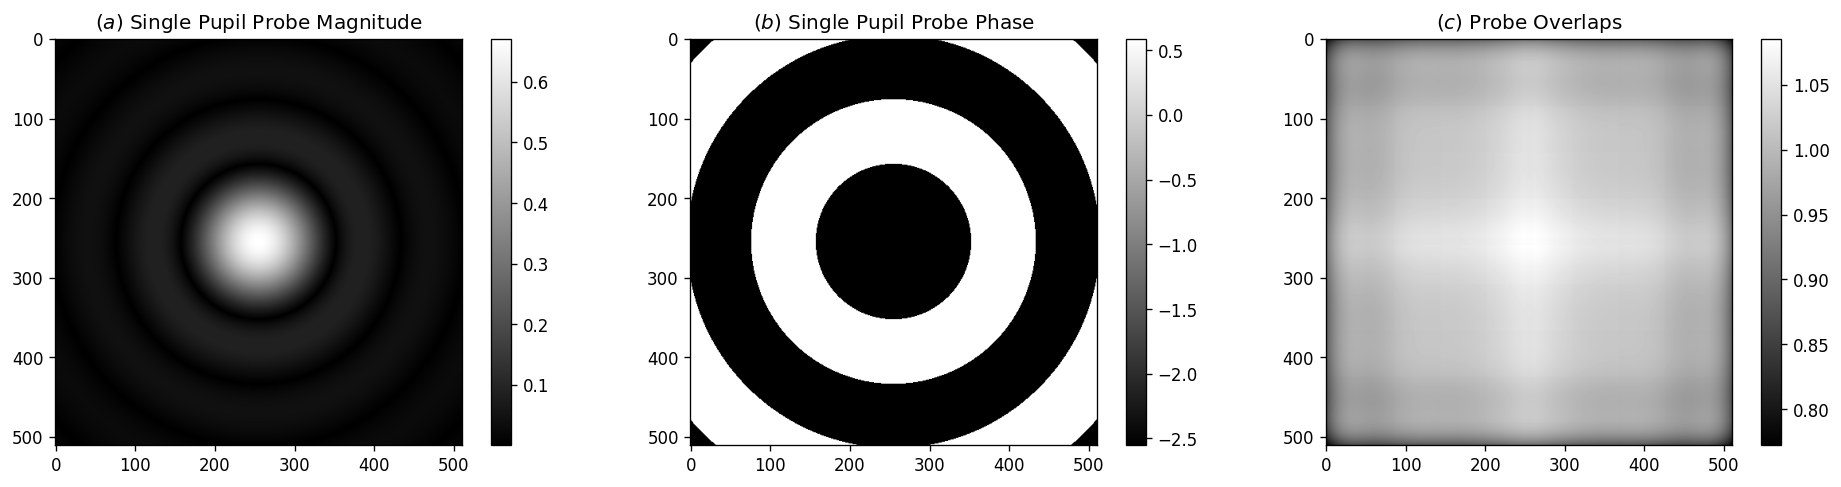

In [8]:
# Plot probe
probe = ptycho_fwd.probe
plt.figure(figsize=(16, 4),dpi = 120)
plt.subplot(1, 3, 1)
plt.imshow(torch.abs(probe),cmap='gray')
plt.title(r'$(a)$ Single Pupil Probe Magnitude')
plt.colorbar()
plt.subplot(1, 3, 2)
plt.imshow(torch.angle(probe),cmap='gray')
plt.title(r'$(b)$ Single Pupil Probe Phase')
plt.colorbar()
overlap_img = get_overlap_img(ptycho_fwd.probe, ptycho_fwd.shifts, n_dim=2)
plt.subplot(1, 3, 3)
plt.imshow(overlap_img,cmap='gray')
plt.title(r'$(c)$ Probe Overlaps')
plt.colorbar()
plt.tight_layout()
plt.show()